Name: Lakshya R
 Domain: Data Science Internship
 TASK 5:CREDIT CARD FRAUD DETECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
credit_card_data = pd.read_csv(r"/content/creditcard.csv")

In [3]:
ccd = credit_card_data.copy()

In [4]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23858 entries, 0 to 23857
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23858 non-null  int64  
 1   V1      23858 non-null  float64
 2   V2      23858 non-null  float64
 3   V3      23858 non-null  float64
 4   V4      23858 non-null  float64
 5   V5      23858 non-null  float64
 6   V6      23858 non-null  float64
 7   V7      23858 non-null  float64
 8   V8      23858 non-null  float64
 9   V9      23858 non-null  float64
 10  V10     23858 non-null  float64
 11  V11     23858 non-null  float64
 12  V12     23858 non-null  float64
 13  V13     23858 non-null  float64
 14  V14     23858 non-null  float64
 15  V15     23858 non-null  float64
 16  V16     23858 non-null  float64
 17  V17     23858 non-null  float64
 18  V18     23858 non-null  float64
 19  V19     23858 non-null  float64
 20  V20     23858 non-null  float64
 21  V21     23858 non-null  float64
 22

In [5]:
ccd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
class_distribution = ccd['Class'].value_counts()
print("Class Distribution (%):")
print(class_distribution / len(ccd) * 100)

Class Distribution (%):
Class
0.0    99.626960
1.0     0.368849
Name: count, dtype: float64


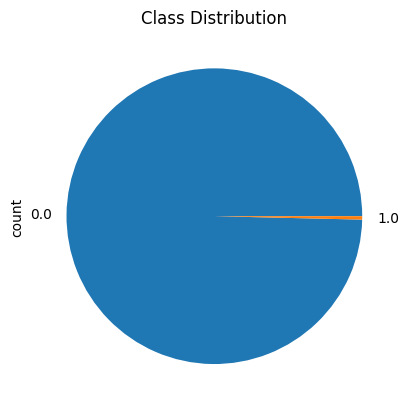

In [7]:
class_distribution.plot.pie()
plt.title('Class Distribution')
plt.show()

In [8]:
normal_percentage = round(class_distribution[0] / len(ccd) * 100, 2)
fraud_percentage = round(class_distribution[1] / len(ccd) * 100, 2)
print("Percentage of Normal Transactions:", normal_percentage)
print("Percentage of Fraudulent Transactions:", fraud_percentage)

Percentage of Normal Transactions: 99.63
Percentage of Fraudulent Transactions: 0.37


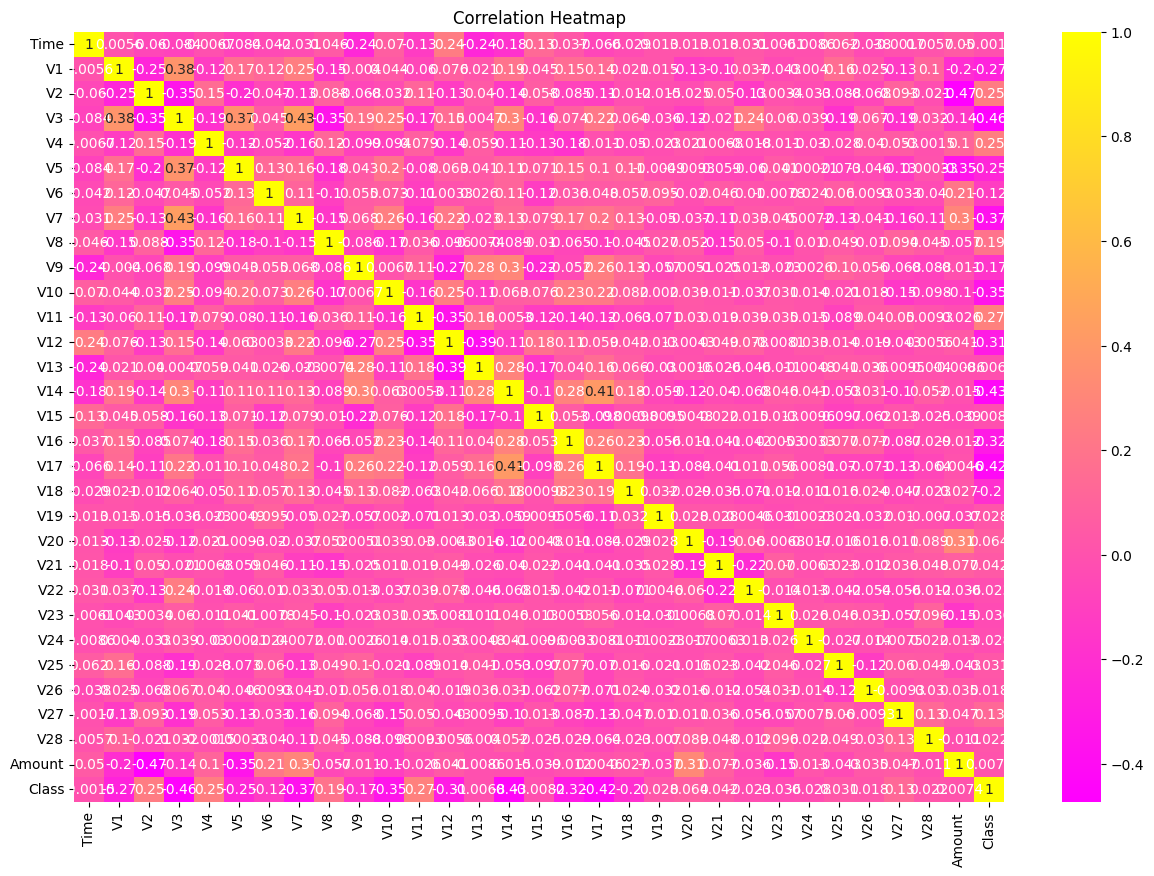

In [9]:
corr = ccd.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap='spring', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
legit = ccd[ccd.Class == 0]
fraud = ccd[ccd.Class == 1]
print("Normal Transaction Amount Statistics:")
print(legit.Amount.describe())
print("\nFraudulent Transaction Amount Statistics:")
print(fraud.Amount.describe())

Normal Transaction Amount Statistics:
count    23769.000000
mean        73.880199
std        212.541174
min          0.000000
25%          6.000000
50%         18.110000
75%         65.850000
max       7879.420000
Name: Amount, dtype: float64

Fraudulent Transaction Amount Statistics:
count      88.000000
mean      100.010000
std       265.845031
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64


In [11]:
print("\nGroup Statistics by Class:")
print(ccd.groupby('Class').describe())
print("\nMean Values by Class:")
print(ccd.groupby('Class').mean())


Group Statistics by Class:
          Time                                                              \
         count         mean           std    min     25%      50%      75%   
Class                                                                        
0.0    23769.0  18213.77782  11385.551254    0.0  6579.0  20579.0  29024.0   
1.0       88.0  17935.87500   8766.984265  406.0  8860.5  17963.0  26872.0   

                     V1            ...       V28             Amount  \
           max    count      mean  ...       75%       max    count   
Class                              ...                                
0.0    32954.0  23769.0 -0.208135  ...  0.076675  4.860769  23769.0   
1.0    32745.0     88.0 -8.613716  ...  0.478252  1.108933     88.0   

                                                                
             mean         std  min  25%    50%    75%      max  
Class                                                           
0.0     73.880199  212.541174 

In [12]:
normal_sample = legit.sample(n=492)
new_dataset = pd.concat([normal_sample, fraud], axis=0)

In [13]:
print("\nClass Distribution in the New Dataset:")
print(new_dataset['Class'].value_counts())


Class Distribution in the New Dataset:
Class
0.0    492
1.0     88
Name: count, dtype: int64


In [14]:
delta_time = pd.to_timedelta(new_dataset['Time'], unit='s')
new_dataset['time_hour'] = (delta_time.dt.components.hours).astype(int)
new_dataset.drop(columns='Time', axis=1, inplace=True)

In [15]:
X = new_dataset.drop('Class', axis=1)
y = new_dataset['Class']


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3, stratify=y)


In [17]:
cols = list(X.columns.values)
normal_entries = new_dataset.Class == 0
fraud_entries = new_dataset.Class == 1


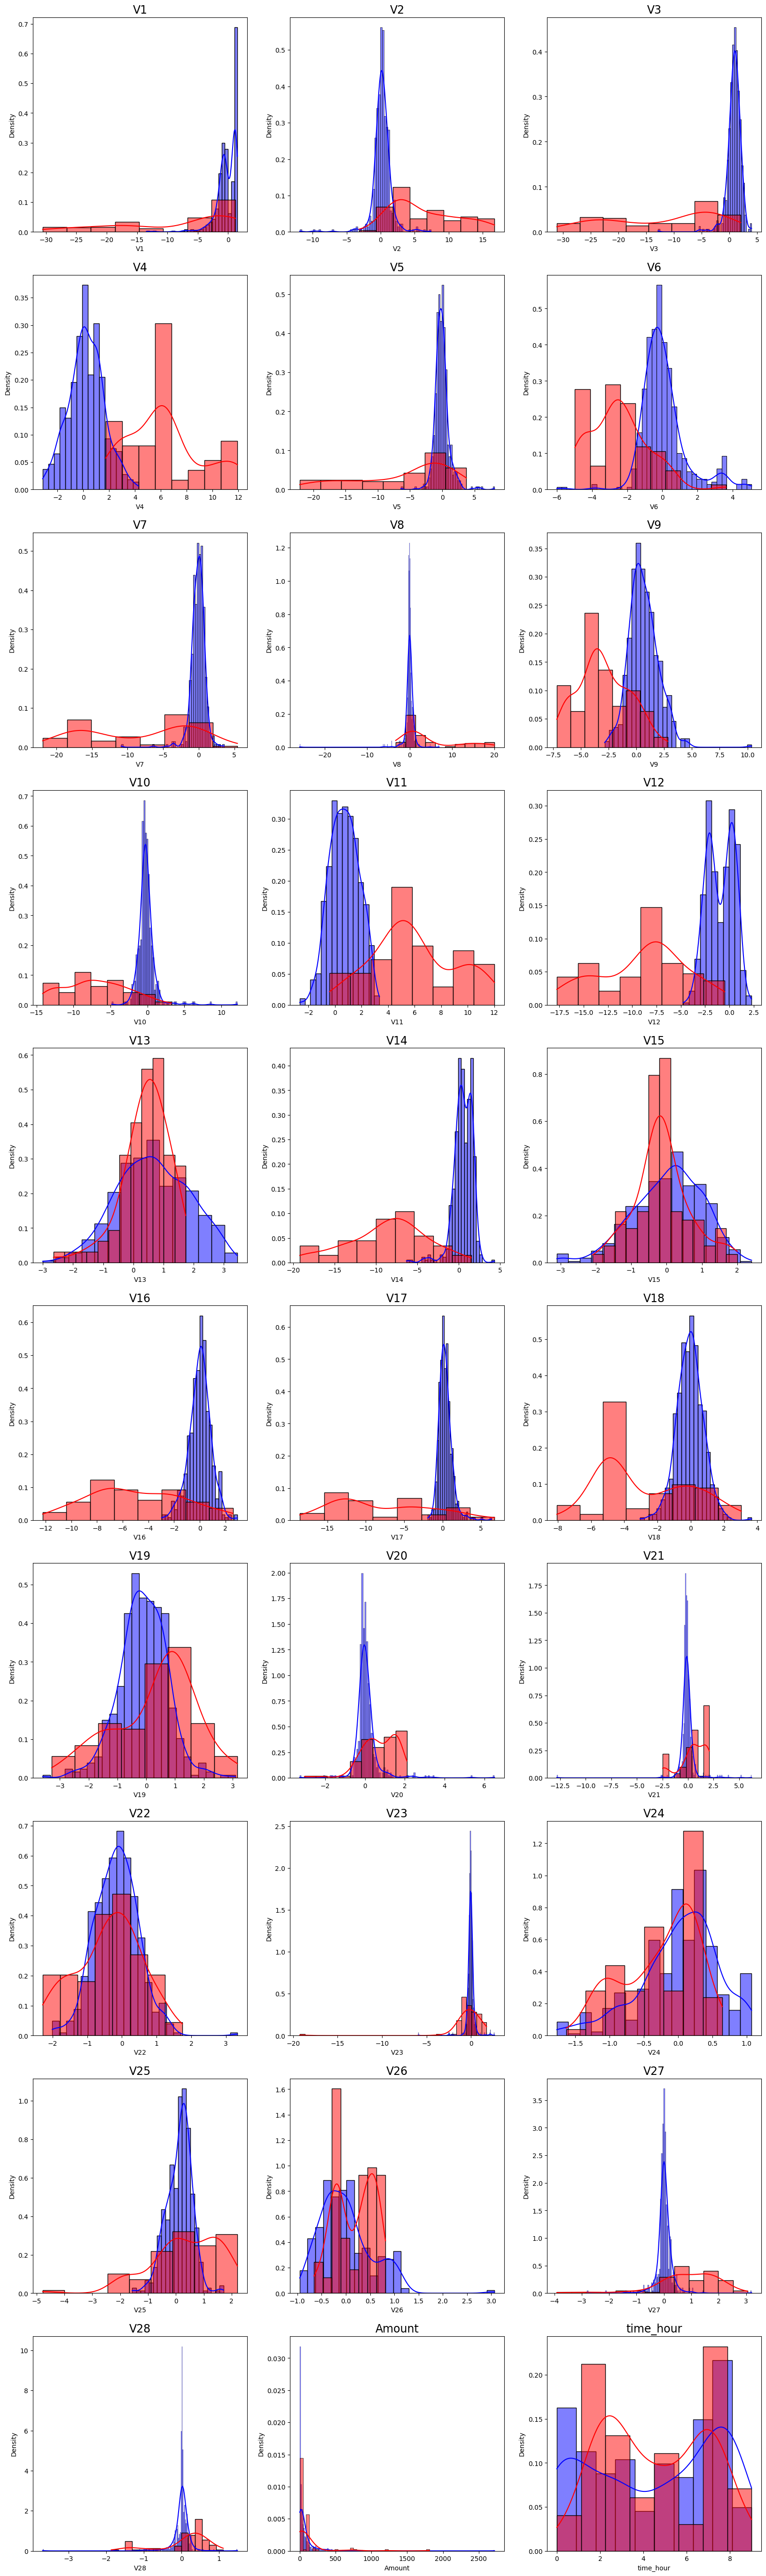

In [19]:
plt.figure(figsize=(20, 70))
for n, col in enumerate(cols):
    plt.subplot(10, 3, n + 1)
    sns.histplot(X[col][normal_entries], color='blue', kde=True, stat='density')
    sns.histplot(X[col][fraud_entries], color='red', kde=True, stat='density')
    plt.title(col, fontsize=17)
plt.show()

In [20]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [22]:
train_accuracy = round(accuracy_score(y_train, y_pred_train) * 100, 2)
test_accuracy = round(accuracy_score(y_test, y_pred_test) * 100, 2)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 99.08
Test Accuracy: 98.62


In [23]:
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9545454545454546
Recall: 0.9545454545454546
F1-Score: 0.9545454545454546


In [24]:
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       123
         1.0       0.95      0.95      0.95        22

    accuracy                           0.99       145
   macro avg       0.97      0.97      0.97       145
weighted avg       0.99      0.99      0.99       145

